# Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

In [3]:
# Training
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
# Making predction
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [5]:
y_pred

array([ True, False])

# Building a image classfier

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

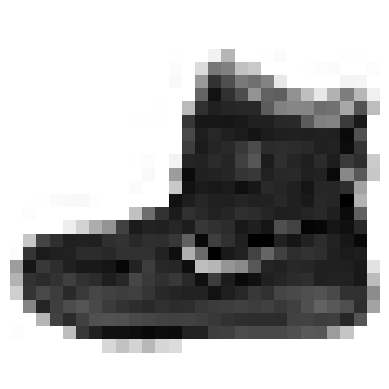

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.axis(False)
plt.show()

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Ankle boot'

In [11]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

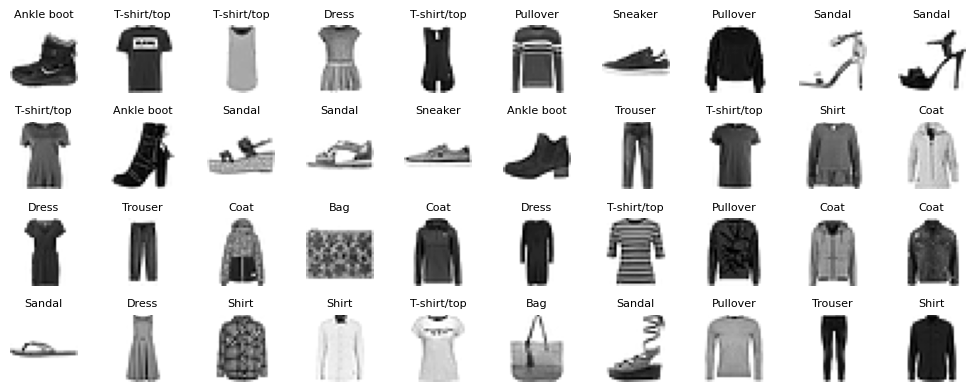

In [12]:
import matplotlib.pyplot as plt

n_rows, n_cols = 4, 10
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))

for idx, ax in enumerate(axes.flat):
    ax.imshow(X_train[idx], cmap="binary")
    ax.axis("off")
    ax.set_title(class_names[y_train[idx]], fontsize=8)

plt.tight_layout(pad=1.0)
plt.show()

# Creating the model using the Sequential API

neural network (MLP)

In [13]:
# model = keras.models.Sequential()

# model.add(keras.layers.InputLayer(input_shape=[28, 28]))
# model.add(tf.keras.layers.Flatten())
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [75]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)